## Imports

In [ ]:
import math
from pathlib import Path
import time

import tensorflow as tf

from tfvspt.config.config import get_config
from tfvspt.tf.data import Dataset
from tfvspt.tf.model import get_model
from tfvspt.tf.utils import plot_history
from tfvspt.tf.utils import plot_images
from tfvspt.tf.utils import set_seed

2025-03-19 11:36:51.248021: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-19 11:36:51.263609: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742364411.281834   10272 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742364411.287084   10272 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742364411.301335   10272 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## Read Config

In [ ]:
config = get_config("../../assets/config.yaml")
config

Config(seed=25, n_classes=100, bs=32, imgsz=(32, 32), lr=0.001, epochs=20, output='./output')

## Set Seed

In [3]:
set_seed(config.seed)

## Dataset

### Name: CIFAR100

In [4]:
dataset = Dataset(config=config)
(x_train, y_train), (x_test, y_test) = Dataset.get_data()
print(f"Traindata size: {len(x_train)}")

Traindata size: 50000


In [5]:
st = time.time()
train_ds = dataset.load_dataset(x_train, y_train, shuffle=True, repeat=True)
print(f"[TF] Dataset loading time: {time.time() - st}")

[TF] Dataset loading time: 0.5624265670776367


2025-03-19 11:36:55.104323: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


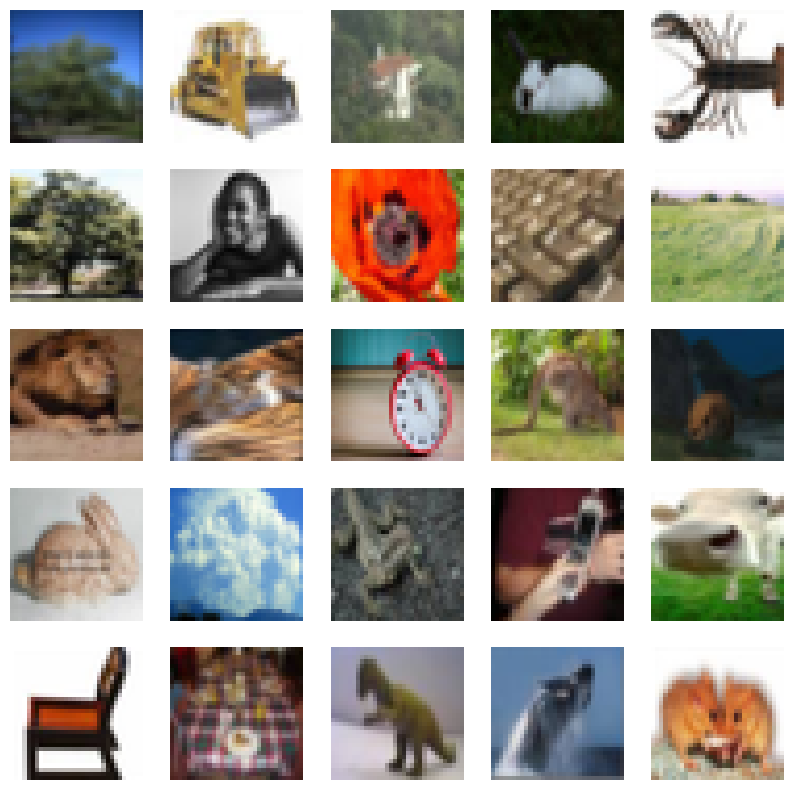

In [6]:
plot_images(train_ds)

## Model

In [7]:
st = time.time()
model = get_model(input_shape=(*config.imgsz, 3), n_classes=config.n_classes)
print(f"[TF] Model loading time: {time.time() - st}")
model.summary()

[TF] Model loading time: 0.10998845100402832


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        12,900 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 123,556 (482.64 KB)

 Trainable params: 123,108 (480.89 KB)

 Non-trainable params: 448 (1.75 KB)

## Train

In [8]:
output_path = Path(config.output) / "tf"
output_path.mkdir(parents=True, exist_ok=True)

In [9]:
# Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=config.lr)

# Loss
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# Model
model.compile(
    optimizer=optimizer,
    loss=loss,
    metrics=["accuracy"],
)

In [10]:
# Training history logger
csv_logger = tf.keras.callbacks.CSVLogger(
    str(output_path / 'cifar100_training.csv'), 
    separator=",", 
    append=False
)

In [11]:
st = time.time()
history = model.fit(
    train_ds,
    epochs=config.epochs,
    shuffle=False,
    steps_per_epoch=math.ceil(len(x_train)/config.bs),
    callbacks=[csv_logger],
)
print(f"[TF] Training time: {time.time() - st}")

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.0956 - loss: 3.9481
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.2351 - loss: 3.0588
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.3013 - loss: 2.7306
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3481 - loss: 2.5203
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.3740 - loss: 2.3673
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 37s 23ms/step - accuracy: 0.4058 - loss: 2.2271
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4288 - loss: 2.1251
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.4437 - loss: 2.0398
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4622 - loss: 1.9564
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.4756 - loss: 1.9049
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.4942 - loss: 1.8354
Epoch 12

## Visualize Training History

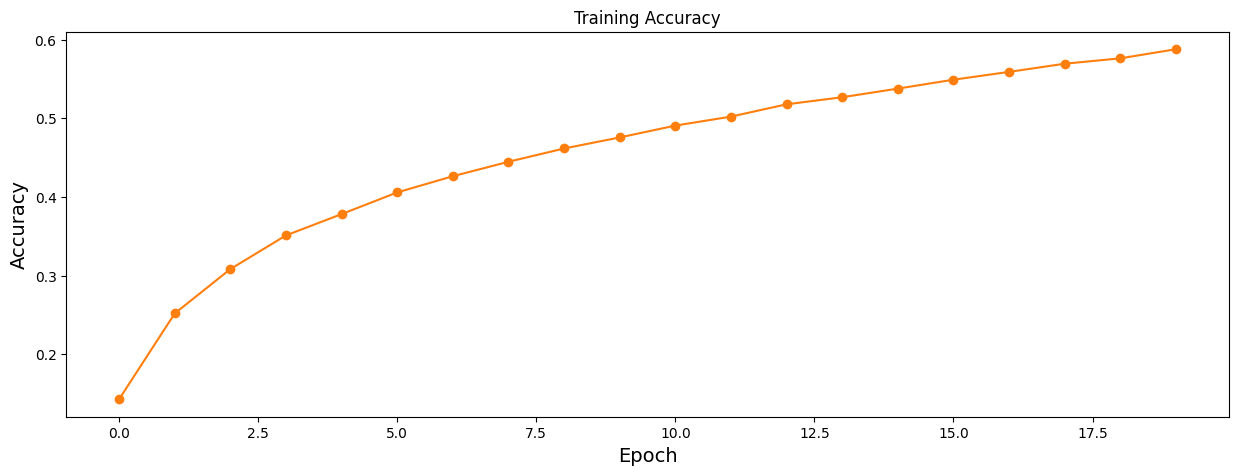

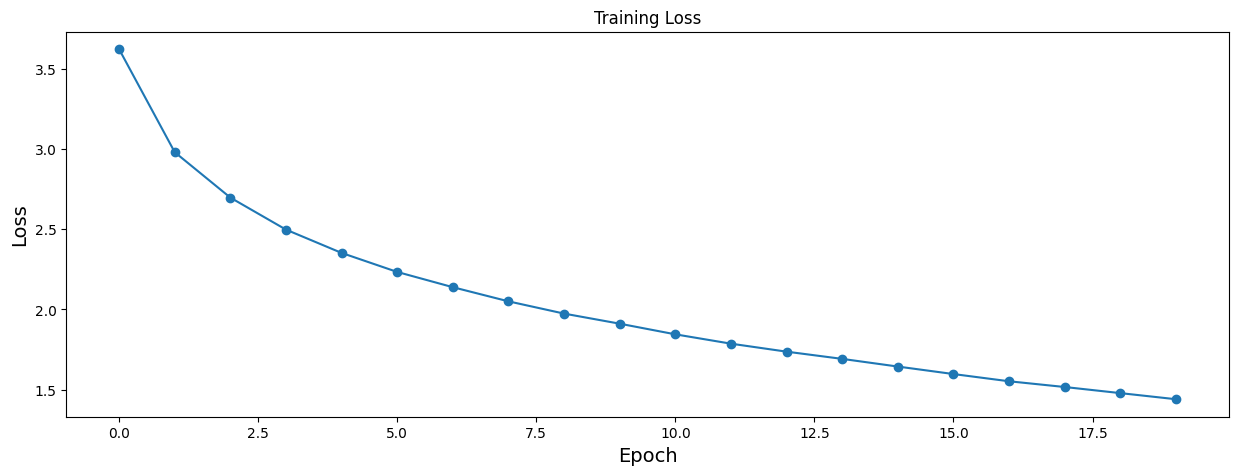

In [12]:
plot_history(history)

## Save Model

In [13]:
st = time.time()
model.save(str(output_path / "cifar100.keras"))
print(f"[TF] Model Saving time: {time.time() - st}")

[TF] Model Saving time: 0.08504319190979004
